# Aprendizaje de maquina - TP 2

## Importando bibliotecas

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import neighbors, metrics, preprocessing

## Ejercicio 1

### Definiendo funciones a utilizar

In [ ]:
def label_vector(value, shape):
  return np.full(
                 shape = shape,
                 fill_value = value,
                 dtype = np.object
                 )

In [ ]:
def create_dataset(distribution_a, distribution_b, number_of_elements):
  data_a = {'x': distribution_a[:, 0], 'y': distribution_a[:, 1], 'label': label_vector('a', number_of_elements)}
  data_b = {'x': distribution_b[:, 0], 'y': distribution_b[:, 1], 'label': label_vector('b', number_of_elements)}
  dataset =  pd.DataFrame(data = data_a).append(pd.DataFrame(data = data_b))
  return dataset

### Eligiendo la cantidad de elementos y creando las dos distribuciones

In [ ]:
number_of_elements = 100

Definiendo las medias y matrices de covarianza de cada distribucion

In [ ]:
mean_a = [3, 6]
cov_a = [[2, 0], [0, 5]]

mean_b = [5, 6]
cov_b = [[2, 0], [0, 4]]

Creando al distribucion

In [ ]:
distribution_a = np.random.multivariate_normal(mean_a, cov_a, number_of_elements)
distribution_b = np.random.multivariate_normal(mean_b, cov_b, number_of_elements)

### Creando el dataset

In [ ]:
dataset = create_dataset(distribution_a, distribution_b, number_of_elements)

In [ ]:
dataset

,x,y,label
0,4.739979,4.689704,a
1,2.621193,4.643513,a
2,1.669858,6.548281,a
3,0.917987,7.737678,a
4,3.997487,6.226445,a
...,...,...,...
95,3.784419,6.559136,b
96,4.958713,7.033893,b
97,5.115138,8.737719,b
98,6.025620,9.123381,b


Text(0, 0.5, 'y')

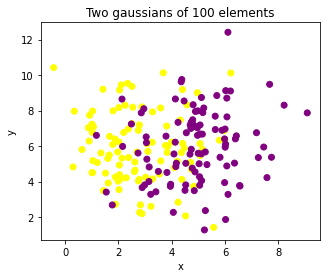

In [ ]:
colors = {'a':'yellow', 'b':'purple'}

plt.figure(figsize=(5, 4))
plt.scatter(dataset['x'], dataset['y'], c = dataset['label'].apply(lambda x: colors[x]))
plt.title(f"Two gaussians of {number_of_elements} elements")
plt.xlabel("x")
plt.ylabel("y")

### Creando knn y evaluandolo

#### Preparo datos y separo el dataset en train y test

Transformo la variable target a numerica

In [ ]:
numerical = {'a': 0, 'b': 1}
numerical_dataset = dataset.copy()
numerical_dataset['label'] = numerical_dataset['label'].apply(lambda x: numerical[x])

In [ ]:
numerical_dataset

,x,y,label
0,4.739979,4.689704,0
1,2.621193,4.643513,0
2,1.669858,6.548281,0
3,0.917987,7.737678,0
4,3.997487,6.226445,0
...,...,...,...
95,3.784419,6.559136,1
96,4.958713,7.033893,1
97,5.115138,8.737719,1
98,6.025620,9.123381,1


Separo en training set y test set

In [ ]:
data_x = numerical_dataset.drop('label', axis=1)
data_y = numerical_dataset['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.5)

#### Creando el clasificador y haciendo fit

Uso la distancia de Minkowski con P = 2 (distancia euclidea)

In [ ]:
knn_20 = neighbors.KNeighborsClassifier(n_neighbors = 20)
knn_10 = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn_1 = neighbors.KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn_20.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
knn_10.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Evaluando el modelo

Predicciones

In [ ]:
predicted_labels = [knn_20.predict(x_test), knn_10.predict(x_test),  knn_1.predict(x_test)]

Graficando

Text(0, 0.5, 'y')

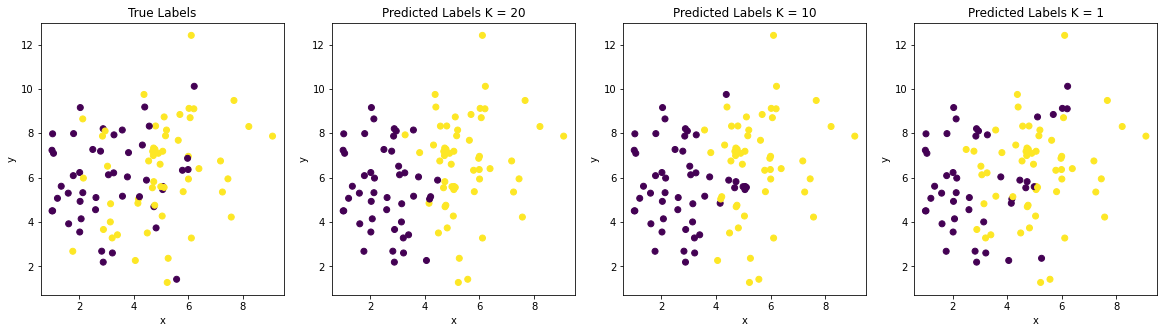

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.scatter(x_test['x'], x_test['y'], c = y_test)
plt.title('True Labels')
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,2)
plt.scatter(x_test['x'], x_test['y'], c = predicted_labels[0])
plt.title('Predicted Labels K = 20')
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,3)
plt.scatter(x_test['x'], x_test['y'], c = predicted_labels[1])
plt.title('Predicted Labels K = 10')
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,4,4)
plt.scatter(x_test['x'], x_test['y'], c = predicted_labels[2])
plt.title('Predicted Labels K = 1')
plt.xlabel("x")
plt.ylabel("y")

De los graficos puede observarse que la mejor separacion para esta corrida se obtiene con K = 20

#### Metricas

F1 y Recall

In [ ]:
fmeas = metrics.f1_score(y_test, predicted_labels[0])
print("f-measure for k = 20 and 0.5 percent of data test: %f" %fmeas )
recall = metrics.recall_score(y_test, predicted_labels[0])
print("recall for k = 20 and 0.5 percent of data test: %f" %recall )

f-measure for k = 20 and 0.5 percent of data test: 0.752294
recall for k = 20 and 0.5 percent of data test: 0.759259


In [ ]:
fmeas = metrics.f1_score(y_test, predicted_labels[1])
print("f-measure for k = 10 and 0.5 percent of data test: %f" %fmeas )
recall = metrics.recall_score(y_test, predicted_labels[1])
print("recall for k = 10 and 0.5 percent of data test: %f" %recall )

f-measure for k = 10 and 0.5 percent of data test: 0.711538
recall for k = 10 and 0.5 percent of data test: 0.685185


In [ ]:
fmeas = metrics.f1_score(y_test, predicted_labels[2])
print("f-measure for k = 1 and 0.5 percent of data test: %f" %fmeas )
recall = metrics.recall_score(y_test, predicted_labels[2])
print("recall for k = 1 and 0.5 percent of data test: %f" %recall )

f-measure for k = 1 and 0.5 percent of data test: 0.672727
recall for k = 1 and 0.5 percent of data test: 0.685185


Accuracy vs K

In [ ]:
K = [1, 2, 3, 5, 10, 15, 20, 30, 50, 60, 70, 90]
accur = []

for k in K:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)
    accur.append(metrics.accuracy_score(y_test, predicted_labels))

Text(0.5, 0, 'K')

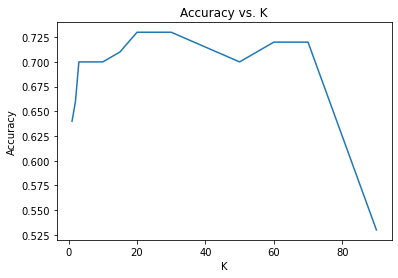

In [ ]:
plt.plot(K, accur)
plt.title('Accuracy vs. K')
plt.ylabel('Accuracy')
plt.xlabel('K')

Realizando distintas corridas, con distintos valores para las gaussianas multivariables, y distintos valores de N, obtengo que las metricas varian mucho. Es decir, hay una fuerte incidencia de la aleatoriedad del dataset en los resultados. 

En caso de que el dataset tenga mas dimensiones, el procedimiento no cambiaria demasiado, ya que el algoritmo funcionaria de la misma forma. Es decir, haria fit con los datos de entrenamiento, y luego haria predicciones en base a la cantidad de vecinos elegidos para entrenar. Lo que cambiaria respecto a lo hecho, son los graficos, ya que en este caso son dos dimensiones (x e y), pero podrian graficarse hasta las 3. En caso de seguir aumentado las dimensiones, no se podria graficar.

## Ejercicio 2

### Carga del dataset y analisis exploratorio

In [67]:
dataset_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

In [68]:
dataset_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [69]:
dataset_spotify.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

Se tienen variables numericas (int64 y float64), excepto por 'song_title' y 'artist' que son de tipo string.

In [70]:
dataset_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Del analisis de las variables numericas, se puede observar que la variable que mayor varianza tiene es el 'tempo' seguida de 'loudness', por lo que se intuye que el dataset tiene distintos tipos de canciones.

In [71]:
dataset_spotify.isna().any()

Unnamed: 0          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
target              False
song_title          False
artist              False
dtype: bool

No hay nulos en ninguna de las variables

In [72]:
dataset_spotify['song_title'].nunique()

1956

In [73]:
dataset_spotify['artist'].nunique()

1343

'song_title' y 'artist' son variables de alta cardinalidad.

In [74]:
dataset = dataset_spotify.copy()
dataset = dataset.drop('Unnamed: 0',1)

In [75]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Hago un drop de la variable 'Unnamed: 0' ya que contiene la misma informacion que el index del dataset

Graficando el histograma de las variables numericas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1365efa3d0>,
      dtype=object)

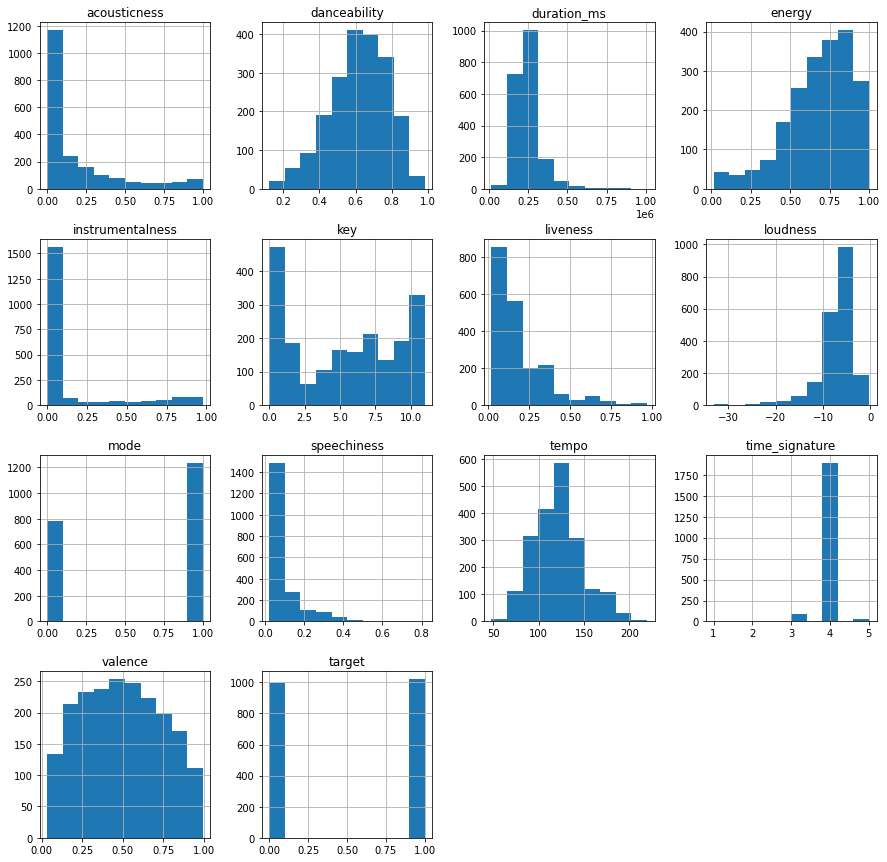

In [76]:
dataset.hist(figsize=(15,15))

In [77]:
for key in dataset:
    MI = metrics.mutual_info_score( dataset[key], dataset_spotify['target'])
    print("%s \t \t|"% key, "MI: %f" % MI)

acousticness 	 	| MI: 0.478568
danceability 	 	| MI: 0.227508
duration_ms 	 	| MI: 0.671391
energy 	 	| MI: 0.228983
instrumentalness 	 	| MI: 0.403923
key 	 	| MI: 0.005212
liveness 	 	| MI: 0.250915
loudness 	 	| MI: 0.628203
mode 	 	| MI: 0.002620
speechiness 	 	| MI: 0.258406
tempo 	 	| MI: 0.660428
time_signature 	 	| MI: 0.001903
valence 	 	| MI: 0.297482
target 	 	| MI: 0.693082
song_title 	 	| MI: 0.684147
artist 	 	| MI: 0.661691


Las variables que tienen mayor coeficiente de correlacion con la variable target son: loudness, song_title, artist y duration_ms. Sin embargo, artist y song_title son variables categoricas de alta cardinalidad, y convertir estas variables en variables numericas utiliza tecnicas mas avanzadas, como por ejemplo usar embeddings.

### Preparacion de datos

Me quedo con las variables que tienen mayor correlacion con la variable target

In [78]:
dataset = dataset[['acousticness', 'instrumentalness',	'loudness', 'duration_ms', 'target']]

In [79]:
dataset.head()

,acousticness,instrumentalness,loudness,duration_ms,target
0,0.0102,0.021900,-8.795,204600,1
1,0.1990,0.006110,-10.401,326933,1
2,0.0344,0.000234,-7.148,185707,1
3,0.6040,0.510000,-15.236,199413,1
4,0.1800,0.512000,-11.648,392893,1


Separando en features y target

In [80]:
y_data = dataset[['target']]
x_data = dataset[['acousticness', 'instrumentalness',	'loudness', 'duration_ms']]

Normalizando los datos

In [81]:
scaler = preprocessing.StandardScaler().fit(x_data)

In [82]:
x_data_scaled = scaler.transform(x_data)

Separando en training set y test set

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size = 0.3)

### Creando KNN y evaluandolo

Evaluo con grid search para encontrar los mejores hiperparametros del modelo

In [86]:
grid_params = {
    'n_neighbors':[5, 11, 15, 21, 25, 35, 41, 45, 49, 51, 53, 55, 75, 101],
    'metric':['euclidean', 'chebyshev'],
    'weights':['uniform', 'distance']
}

g_search = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv = 5,n_jobs = -1 )
g_result = g_search.fit(x_train,  y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Evaluando el modelo

In [87]:
KNN_best_hyperparameters = g_result.best_estimator_
predicted = KNN_best_hyperparameters.predict(x_test)
validation_accuracy = metrics.accuracy_score(y_test, predicted)
validation_recall = metrics.recall_score(y_test, predicted)
validation_f1 = metrics.f1_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)

print("Train accuracy: %f\n" % g_result.best_score_)

print("Grid scores on test set:\n")

print( "Validation accuracy: %f" % validation_accuracy)
print( "Validation recall: %f"   % validation_recall)
print( "Validation f1: %f"       % validation_f1)
print( "Validation precision: %f\n"       % precision)
print("Best hyperparameters: %s" % g_result.best_params_)

Train accuracy: 0.699516

Grid scores on test set:

Validation accuracy: 0.683168
Validation recall: 0.657807
Validation f1: 0.673469
Validation precision: 0.689895

Best hyperparameters: {'metric': 'chebyshev', 'n_neighbors': 41, 'weights': 'distance'}
